In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
df = pd.read_csv('../data/division_offences_by_seifa_indexes.csv')
df.describe()

,Violent Crime,Property Crime,Drug Offences,DV-Related,Other Crimes,Total Crimes,IRSD Score,IRSD Decile,IRSDA Score,IRSDA Decile,IER Score,IER Decile,IEO Score,IEO Decile,Usual Resident Population,Violent_DV_Crime,log_vdv_crime,scaled_log_vdv_violence
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,759.515031,2585.527809,586.214224,203.183071,1837.937345,5972.377480,936.728565,3.431416,924.438225,3.480088,943.061120,2.965074,920.516045,3.295133,5945.964602,962.698102,6.534636,-0.101612
std,720.359716,3182.555893,583.004907,232.079277,1557.563931,5675.094658,107.181988,2.499055,86.307256,2.787401,99.583605,2.225093,80.049524,2.848629,6552.719918,935.703319,0.792799,0.878373
min,85.700758,271.721959,25.276461,25.443511,244.535519,718.579235,492.476114,1.000000,658.673564,1.000000,509.381303,1.000000,758.922157,1.000000,487.000000,112.689394,4.733470,-2.097193
25%,318.495980,889.183882,227.044286,70.146967,896.906536,2632.546429,888.529999,1.000000,873.683447,1.000000,911.572209,1.000000,865.404639,1.000000,1188.000000,406.404866,6.009801,-0.683097
50%,500.098276,1546.928780,457.875173,130.871086,1399.872432,4065.617261,954.228299,3.000000,923.027495,2.000000,947.683514,2.000000,901.361503,2.000000,3180.000000,613.545032,6.420882,-0.227644
75%,859.570080,3273.064390,696.961115,220.898982,2184.018679,7496.468159,1008.749203,5.000000,980.442381,5.000000,1004.775029,4.000000,966.519640,5.000000,8842.750000,1091.419447,6.996147,0.409714
max,3945.641987,27694.001874,4224.929709,1437.185930,11090.909091,47652.764761,1104.983298,10.000000,1142.701375,10.000000,1109.376117,10.000000,1151.337505,10.000000,37951.000000,5214.686623,8.559426,2.141731


In [146]:
# Select relevant numeric columns
cols_of_interest = ['Violent_DV_Crime', 'IRSD Score', 'IER Score', 'IEO Score', 'scaled_log_vdv_violence']
corr_matrix = df[cols_of_interest].corr()

# Display the correlation matrix
print(corr_matrix)
# save the correlation matrix to a CSV file
corr_matrix.to_csv('../results/correlation_matrix.csv', index=True)


                         Violent_DV_Crime  IRSD Score  IER Score  IEO Score  \
Violent_DV_Crime                 1.000000   -0.509640  -0.609603  -0.105340   
IRSD Score                      -0.509640    1.000000   0.921657   0.725955   
IER Score                       -0.609603    0.921657   1.000000   0.515521   
IEO Score                       -0.105340    0.725955   0.515521   1.000000   
scaled_log_vdv_violence          0.892850   -0.443304  -0.512734  -0.104075   

                         scaled_log_vdv_violence  
Violent_DV_Crime                        0.892850  
IRSD Score                             -0.443304  
IER Score                              -0.512734  
IEO Score                              -0.104075  
scaled_log_vdv_violence                 1.000000  


In [112]:
# create variables to hold results
pearson_results = {}
spearman_results = {}
lasso_results = {}
ridge_results = {}
linear_regression_results = {}

In [117]:
seifa_scores = ['IRSDA Score', 'IRSD Score', 'IER Score', 'IEO Score']

for seifa in seifa_scores:
    r, p = stats.pearsonr(df['Violent_DV_Crime'], df[seifa])
    pearson_results[seifa] = (r, p)
    print(f"{'Violent_DV_Crime'} vs {seifa}: r = {r:.3f}, p = {p:.5f} {'✅' if p < 0.05 else '❌'}")
print("\n")

for results in pearson_results:
    print(f"Pearson correlation for {results}: {pearson_results[results][0]:.3f}")
    print(f"p-value for {results}: {pearson_results[results][1]:.5f}")

Violent_DV_Crime vs IRSDA Score: r = -0.327, p = 0.00000 ✅
Violent_DV_Crime vs IRSD Score: r = -0.510, p = 0.00000 ✅
Violent_DV_Crime vs IER Score: r = -0.610, p = 0.00000 ✅
Violent_DV_Crime vs IEO Score: r = -0.105, p = 0.11428 ❌


Pearson correlation for IRSDA Score: -0.327
p-value for IRSDA Score: 0.00000
Pearson correlation for IRSD Score: -0.510
p-value for IRSD Score: 0.00000
Pearson correlation for IER Score: -0.610
p-value for IER Score: 0.00000
Pearson correlation for IEO Score: -0.105
p-value for IEO Score: 0.11428


In [97]:

X = df[['IER Score', 'IEO Score']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Check for multicollinearity
print("Multicollinearity check:")
print(vif_data[vif_data["VIF"] > 5])  # VIF > 5 indicates multicollinearity

Multicollinearity check:
     feature         VIF
0  IER Score  109.947343
1  IEO Score  109.947343


In [56]:
# It seems that there is multicollinearity between all three SEIFA scores.


In [158]:
X = df[['IRSDA Score', 'IRSD Score', 'IER Score', 'IEO Score']]
y = df['scaled_log_vdv_violence']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)

# Fit Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

# Coefficients
print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)

Ridge Coefficients: [ 0.24298933 -0.49661154 -0.28198658  0.19515452]
Lasso Coefficients: [ 0.         -0.         -0.34937381  0.        ]


In [159]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_scaled, y)
print("Best alpha:", lasso_cv.alpha_)
lasso_results = pd.Series(lasso_cv.coef_, index=X.columns)
# Display Lasso coefficients
print("Lasso coefficients:")
print(lasso_results)

Best alpha: 0.009681465175890578
Lasso coefficients:
IRSDA Score    0.000000
IRSD Score    -0.255721
IER Score     -0.337356
IEO Score      0.258660
dtype: float64


In [131]:
alphas = np.logspace(-4, 1, 100)  # try a range of alpha values
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_scaled, y)

print("Best alpha (Ridge):", ridge_cv.alpha_)
ridge_results = pd.Series(ridge_cv.coef_, index=X.columns)
# Display Ridge coefficients
print("Ridge coefficients:")
print(ridge_results)

Best alpha (Ridge): 10.0
Ridge coefficients:
IRSDA Score    0.041916
IRSD Score    -0.288082
IER Score     -0.324655
IEO Score      0.237079
dtype: float64


In [139]:
# Lasso predictions
lasso_preds = lasso_cv.predict(X_scaled)
ridge_preds = ridge_cv.predict(X_scaled)

# Evaluation
print("Lasso R²:", r2_score(y, lasso_preds))
print("Ridge R²:", r2_score(y, ridge_preds))
print("Lasso MSE:", mean_squared_error(y, lasso_preds))
print("Ridge MSE:", mean_squared_error(y, ridge_preds))

# save evaluation results
lasso_preds_df = pd.DataFrame({'True': y, 'Predicted': lasso_preds})
lasso_preds_df.to_csv('../results/lasso_predictions.csv', index=False)
ridge_preds_df = pd.DataFrame({'True': y, 'Predicted': ridge_preds})
ridge_preds_df.to_csv('../results/ridge_predictions.csv', index=False)

Lasso R²: 0.30671545560400126
Ridge R²: 0.30700886606037636
Lasso MSE: 0.5325291441630798
Ridge MSE: 0.5323037682759568


In [140]:
scores = ['IRSDA Score', 'IRSD Score', 'IER Score', 'IEO Score']
score_indices = {
    'IRSDA Score': 0,
    'IRSD Score': 1,
    'IER Score': 2,
    'IEO Score': 3
}
for score in scores:
    idx = score_indices[score]
    X_single = X_scaled[:, [idx]]  # keep as 2D array
    model = LinearRegression()
    model.fit(X_single, y)
    preds = model.predict(X_single)
    
    r2 = r2_score(y, preds)
    mse = mean_squared_error(y, preds)
    linear_regression_results[score] = (r2, mse)
    print(f"{score} - R²: {r2:.3f}, MSE: {mse:.3f}")

IRSDA Score - R²: 0.094, MSE: 0.696
IRSD Score - R²: 0.197, MSE: 0.617
IER Score - R²: 0.263, MSE: 0.566
IEO Score - R²: 0.011, MSE: 0.760


C:\Users\dsmel\AppData\Local\Temp\ipykernel_24588\457118060.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=r2_df, x='R²', y='SEIFA Score', palette='viridis')


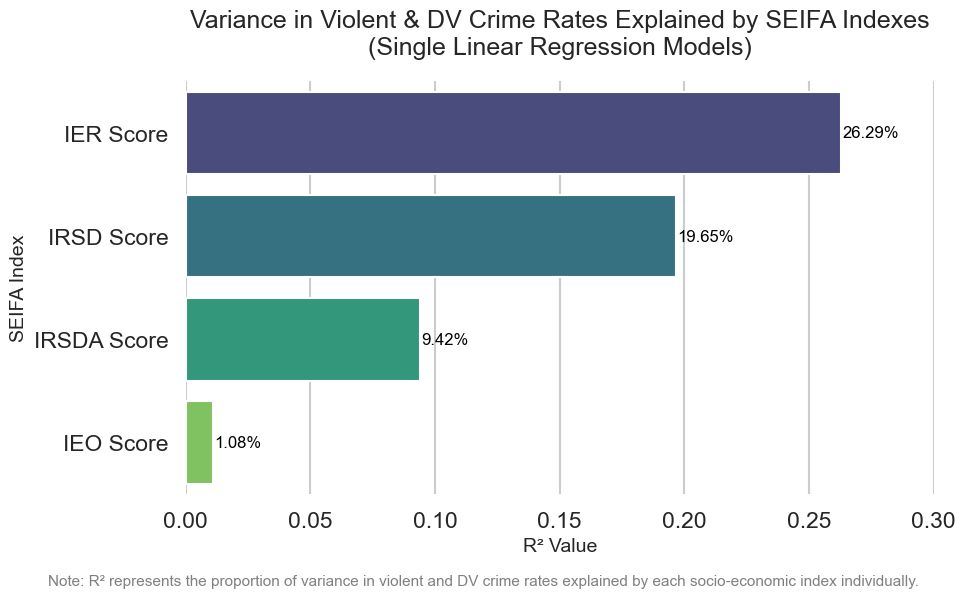

In [156]:
r2_values = {
    'IRSDA Score': linear_regression_results['IRSDA Score'][0],
    'IRSD Score': linear_regression_results['IRSD Score'][0],
    'IER Score': linear_regression_results['IER Score'][0],
    'IEO Score': linear_regression_results['IEO Score'][0]
}

r2_df = pd.DataFrame(list(r2_values.items()), columns=['SEIFA Score', 'R²'])
r2_df = r2_df.sort_values(by='R²', ascending=False)

# Set style and context for a report-ready look
sns.set_theme(style="whitegrid", context="talk")

# Create the barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=r2_df, x='R²', y='SEIFA Score', palette='viridis')

# Title and axis labels
plt.title('Variance in Violent & DV Crime Rates Explained by SEIFA Indexes\n(Single Linear Regression Models)', fontsize=18, pad=20)
plt.xlabel('R² Value', fontsize=14)
plt.ylabel('SEIFA Index', fontsize=14)

# Set x-axis limits for consistency
plt.xlim(0, 0.3)

# Add value labels on bars
for index, value in enumerate(r2_df['R²']):
    plt.text(value + 0.0005, index, f"{value:.2%}", va='center', fontsize=12, color='black')

# Remove top and right spines for a cleaner look
sns.despine(left=True, bottom=True)

# Add a caption
plt.figtext(0.5, -0.005, "Note: R² represents the proportion of variance in violent and DV crime rates explained by each socio-economic index individually.", 
            ha="center", fontsize=11, color='gray')

# Tight layout for better spacing
plt.tight_layout()
plt.show()

In [147]:
results = {
    'IRSDA Score': pearson_results['IRSDA Score'],
    'IRSD Score': pearson_results['IRSD Score'],
    'IER Score': pearson_results['IER Score'],
    'IEO Score': pearson_results['IEO Score'],
}

corr_df = pd.DataFrame(results).T
corr_df.columns = ['r', 'p-value']
corr_df.sort_values(by='r', ascending=True, inplace=True)

# Style table
def highlight_significance(val):
    color = 'background-color: #d4edda' if val < 0.05 else ''
    return color

# Apply styling to the table
styled_df = (corr_df.style
    .applymap(highlight_significance, subset=['p-value'])  # Highlight p-values < 0.05
    .background_gradient(subset=['r'], cmap='coolwarm')  # Gradient for correlation values
    .format({'r': "{:.3f}", 'p-value': "{:.5f}"})  # Formatting the numbers
    .set_properties(**{'text-align': 'center'})  # Center-align text
    .set_table_styles([  # Additional styling for table borders and header
        {'selector': 'th', 'props': [('background-color', '#f7f7f7'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('border', '1px solid #ddd'), ('padding', '8px')]},
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
    ])
)

styled_df.to_html('../results/pearson_correlation_table.html', escape=False, index=True)

C:\Users\dsmel\AppData\Local\Temp\ipykernel_24588\3314386927.py:19: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_significance, subset=['p-value'])  # Highlight p-values < 0.05


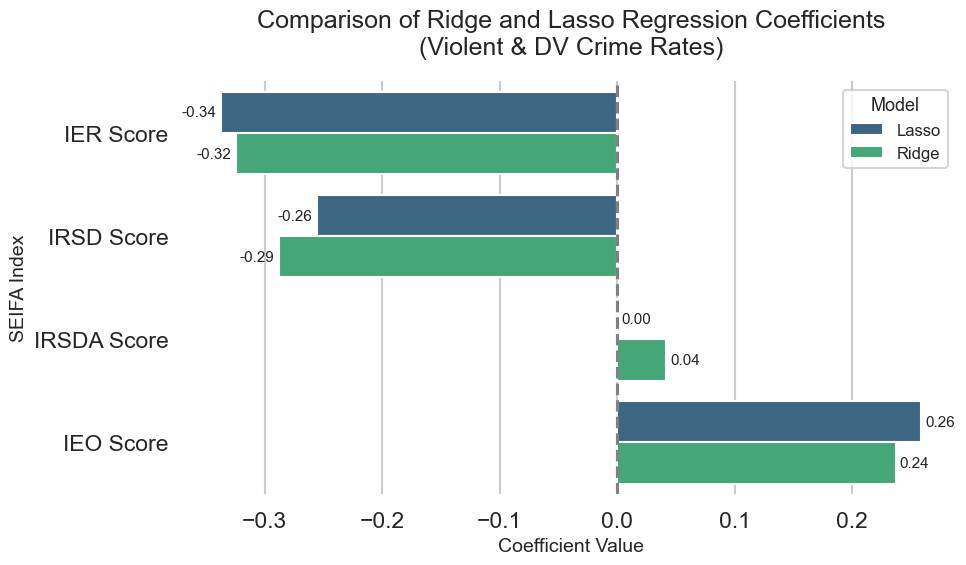

In [ ]:
coef_df = pd.DataFrame({
    'Feature': ['IRSDA Score', 'IRSD Score', 'IER Score', 'IEO Score'],
    'Lasso': lasso_results.values,
    'Ridge': ridge_results.values
})

coef_df_melt = coef_df.melt(id_vars='Feature', var_name='Model', value_name='Coefficient')
coef_df_melt.sort_values(by='Coefficient', ascending=True, inplace=True)

# Create the barplot
plt.figure(figsize=(10, 6))
coef_plot = sns.barplot(data=coef_df_melt, x='Coefficient', y='Feature', hue='Model', palette='viridis')

# Title and axis labels
plt.title('Comparison of Ridge and Lasso Regression Coefficients\n(Violent & DV Crime Rates)', fontsize=18, pad=20)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('SEIFA Index', fontsize=14)

# Add a vertical line at zero for reference
plt.axvline(0, color='grey', linestyle='--')

# Add value labels on the bars
for container in coef_plot.containers:
    coef_plot.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=11)

# Remove top and right spines for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust legend
plt.legend(title='Model', loc='upper right', fontsize=12, title_fontsize=13)

# Tight layout for clean spacing
plt.tight_layout()

# Show plot
plt.show()
#plt.savefig('../results/ridge_vs_lasso_coefficients.png', dpi=300, bbox_inches='tight')
